In [0]:

import sys
import os
import argparse
import random
import time
import datetime
from collections import Counter
import numpy as np
import pandas as pd
import shutil
import inspect
import gc
import re
from PIL import Image
import cv2

import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense


from keras.applications.inception_v3 import InceptionV3
from keras.constraints import maxnorm
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras import backend as K


from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from IPython.display import display

import seaborn as sns

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# Re-Training the model

In [8]:
training_dir = r"train"
testing_dir = r"test"

rescale = 1./255
target_size = (150, 150)
batch_size = 163
class_mode = "categorical"


train_datagen = ImageDataGenerator(
    rescale=rescale,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size,
    shuffle=True)


test_datagen = ImageDataGenerator(rescale=rescale)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=target_size,
    class_mode=class_mode,
    shuffle = False)

from sklearn.utils import class_weight
def get_weight(y):
    class_weight_current =  class_weight.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

class_weight = get_weight(train_generator.classes)
class_weight



Found 5216 images belonging to 2 classes.
Found 632 images belonging to 2 classes.


array([1.9448173 , 0.67303226])

In [21]:
print("Results")
result  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)

print("%s%.2f  "% ("Loss     : ", result[0]))
print("%s%.2f%s"% ("Accuracy : ", result[1]*100, "%")

results
20/20 [==============================] - 136s 7s/step
Loss     : 1.82  
Accuracy : 70.73%


In [14]:


# Load and configure model InceptionV3 for fine-tuning with new class labels
def get_model():    
    
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    x = base_model.output

    x = Flatten()(x)
    
    predictions = Dense(2, activation='softmax')(x) 
    
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    
    for layer in base_model.layers:
        layer.trainable = False
        
    model.summary()
        
    return model





print("Getting Base Model")
model = get_model()
steps_per_epoch=len(train_generator

optimizer=optimizers.Adam()
loss='categorical_crossentropy'
metrics=['accuracy']
epochs = 100


model.compile(optimizer, loss=loss, metrics=metrics)

history = model.fit_generator(train_generator)



Getting Base Model
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_286 (BatchN (None, 74, 74, 32)   96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, 74, 74, 32)   0           batch_normalization_286[0][0]    
_________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/32 [>.............................] - ETA: 18:40 - loss: 1.8748 - acc: 0.5982

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/32 [=>............................] - ETA: 18:03 - loss: 2.1020 - acc: 0.6442

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/32 [==>...........................] - ETA: 17:19 - loss: 2.0463 - acc: 0.6656

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/32 [=====>........................] - ETA: 11:23 - loss: 1.7238 - acc: 0.5986

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/32 [======>.......................] - ETA: 11:24 - loss: 1.5632 - acc: 0.6235

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/32 [=======>......................] - ETA: 11:18 - loss: 1.4822 - acc: 0.6380

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/32 [========>.....................] - ETA: 11:06 - loss: 1.4500 - acc: 0.6521

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/32 [=========>....................] - ETA: 10:50 - loss: 1.4159 - acc: 0.6603

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/32 [==========>...................] - ETA: 10:31 - loss: 1.3377 - acc: 0.6754

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/32 [===========>..................] - ETA: 10:06 - loss: 1.2659 - acc: 0.6904

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/32 [=============>................] - ETA: 8:37 - loss: 1.1418 - acc: 0.7121

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/32 [==============>...............] - ETA: 8:13 - loss: 1.1046 - acc: 0.7186

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/32 [==============>...............] - ETA: 7:49 - loss: 1.0695 - acc: 0.7246

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/32 [===============>..............] - ETA: 7:22 - loss: 1.0299 - acc: 0.7331

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/32 [=================>............] - ETA: 6:05 - loss: 0.9579 - acc: 0.7482

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/32 [==================>...........] - ETA: 5:37 - loss: 0.9295 - acc: 0.7537

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/32 [===================>..........] - ETA: 5:09 - loss: 0.9027 - acc: 0.7585

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/32 [====================>.........] - ETA: 4:40 - loss: 0.8790 - acc: 0.7626

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/32 [=====================>........] - ETA: 4:10 - loss: 0.8626 - acc: 0.7676

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/32 [======================>.......] - ETA: 3:41 - loss: 0.8440 - acc: 0.7715

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/32 [=======================>......] - ETA: 3:10 - loss: 0.8216 - acc: 0.7773

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/32 [========================>.....] - ETA: 2:40 - loss: 0.8049 - acc: 0.7794

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/32 [==========================>...] - ETA: 1:33 - loss: 0.7694 - acc: 0.7884

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


30/32 [===========================>..] - ETA: 1:02 - loss: 0.7545 - acc: 0.7918

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


31/32 [============================>.] - ETA: 31s - loss: 0.7367 - acc: 0.7964 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


32/32 [==============================] - 1016s 32s/step - loss: 0.7261 - acc: 0.7989


# Making some predictions

In [22]:
print("Predictions")
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)  
y_pred = y_pred.argmax(axis=-1)
y_true=test_generator.classes

Predictions
20/20 [==============================] - 9s 469ms/step


In [23]:
precision = precision_score(y_true, y_pred) 
recall = recall_score(y_true, y_pred) 
f1 = f1_score(y_true, y_pred) 

print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))

Precision     : 69.54%
Recall        : 95.23%
F1-Score      : 80.38%


In [28]:
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.78      0.29      0.42       234
           1       0.70      0.95      0.80       398

    accuracy                           0.71       632
   macro avg       0.74      0.62      0.61       632
weighted avg       0.73      0.71      0.66       632



PNEUMONIA
NORMAL
test/NORMAL/NORMAL2-IM-0238-0001.jpeg


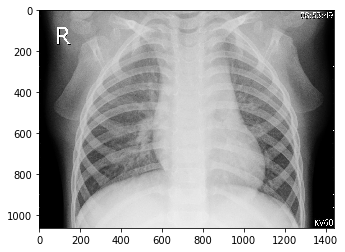

NORMAL
NORMAL
test/NORMAL/IM-0065-0001.jpeg


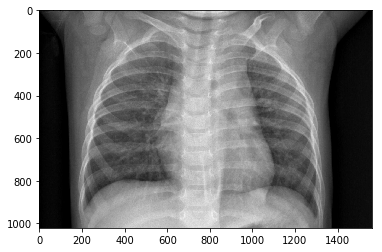

PNEUMONIA
PNEUMONIA
test/PNEUMONIA/person81_bacteria_395.jpeg


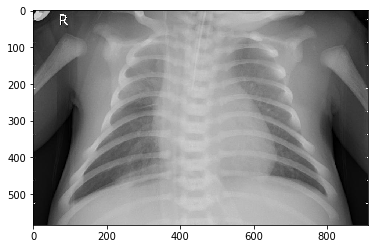

PNEUMONIA
NORMAL
test/NORMAL/IM-0022-0001.jpeg


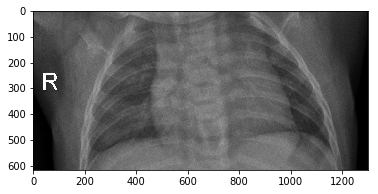

NORMAL
NORMAL
test/NORMAL/NORMAL2-IM-0237-0001.jpeg


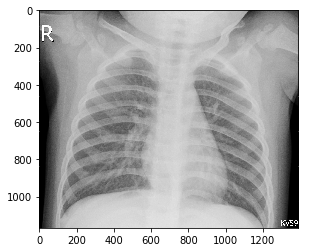

PNEUMONIA
PNEUMONIA
test/PNEUMONIA/person46_virus_96.jpeg


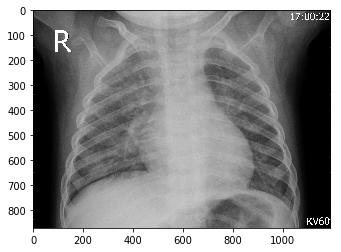

PNEUMONIA
PNEUMONIA
test/PNEUMONIA/person142_bacteria_684.jpeg


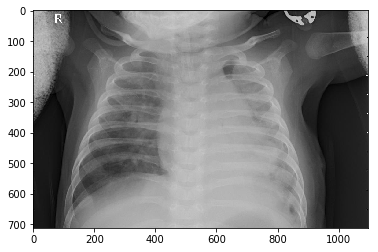

PNEUMONIA
NORMAL
test/NORMAL/IM-0031-0001.jpeg


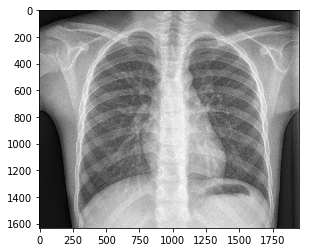

PNEUMONIA
PNEUMONIA
test/PNEUMONIA/person1627_virus_2819.jpeg


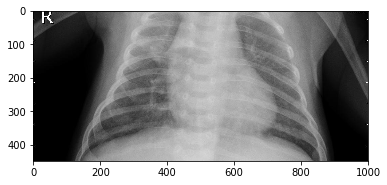

PNEUMONIA
NORMAL
test/NORMAL/NORMAL2-IM-0322-0001.jpeg


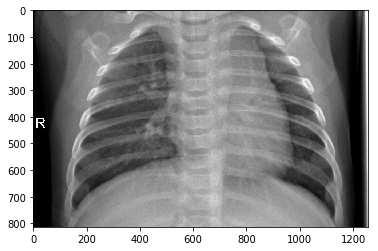

In [83]:
file_names = test_generator.filenames
class_map = {v: k for k, v in test_generator.class_indices.items()}


newArray = np.random.randint(0, 600 + 1, size=10).tolist()

for i in newArray:
  
  print(class_map[y_pred[i]])
  print(class_map[y_true[i]])
  print(testing_dir+"/"+ file_names[i])

  img = cv2.imread(testing_dir+"/"+ file_names[i])
  plt.imshow(img)
  plt.show()

In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

In [0]:
ls